
# pre-trained model for object localization


This code snippet demonstrates loading a pre-trained Faster R-CNN model, preprocessing an image, and performing object detection to get the bounding box coordinates of the detected object.



/data/solai/venvMamabaFixel/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/solai/venvMamabaFixel/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


cow: 1.00


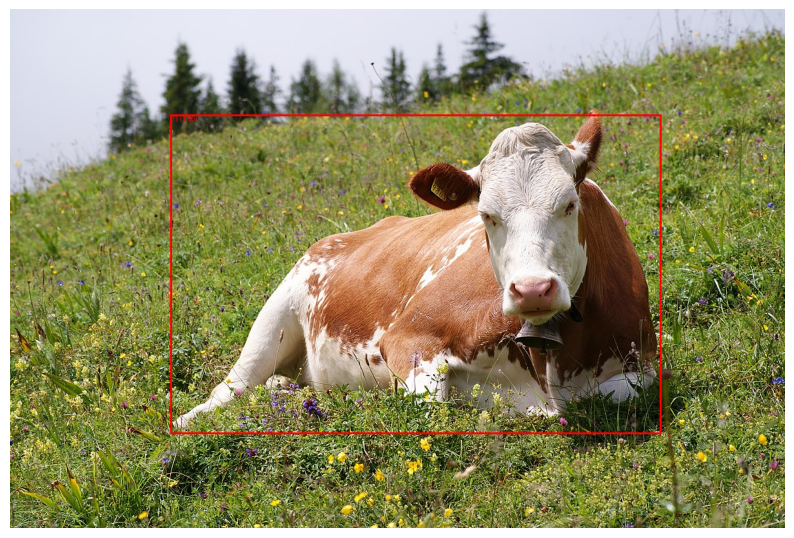

In [10]:
import torch
import torchvision
from PIL import Image, ImageDraw
from torchvision import transforms
import matplotlib.pyplot as plt

# Load a pre-trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant',
    'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A',
    'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Preprocess the image
transform = transforms.Compose([
    transforms.ToTensor(),
])
image_path = '/tmp/cow.jpg'
image = Image.open(image_path)
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Perform object detection
with torch.no_grad():
    predictions = model(image_tensor)

# Extract bounding box coordinates and labels for the first detected object
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

# Threshold for displaying predictions
threshold = 0.5

# Draw bounding box and label on the image
draw = ImageDraw.Draw(image)
for box, label, score in zip(boxes, labels, scores):
    if score >= threshold:
        x1, y1, x2, y2 = box
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
        text = f"{COCO_INSTANCE_CATEGORY_NAMES[label.item()]}: {score:.2f}"
        print(text)
        draw.text((x1, y1), f"{label.item()} ({score:.2f})", fill="red")

# Convert image for displaying with matplotlib
plt_image = transforms.ToTensor()(image).permute(1, 2, 0).numpy()

# Display the image in Jupyter notebook
plt.figure(figsize=(10, 10))
plt.imshow(plt_image)
plt.axis('off')
plt.show()
